<a href="https://colab.research.google.com/github/NLZT/Deep-Dive-Projects/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Regression Analysis for  Home Sales 

##Problem Definition
In this project I will take information about home features and compare them to the sales price of the home to see if there is any relationship between them. Any relationships derived should help me develop a model to better predict the price at which a house will sell for.  

##Data Collection

*   Load Python Packages
*   Load the data contained in Home Data.csv into a DataFrame
*   Create a back-up copy of the original data at the start of the runtime

In [ ]:
#mount drive to import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import python packages
import statsmodels.api as sm
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [ ]:
#import csv data set from google file path
DP = '/content/drive/MyDrive/Copy of Housing Data.csv'
data = pd.read_csv(DP)
data_backup=data.copy()

#IDA


*   Get an idea of what is in the data.
*   Learn the shape and size of the data.
*   Get an idea for the iniditial stats
*   Look for any obvious items that need to be addressed during cleaning or otherwise. 



In [ ]:
data

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     905101070           20        RL          62.0     14299   Pave   NaN   
1     905101330           90        RL          72.0     10791   Pave   NaN   
2     903454090           50        RM          50.0      9000   Pave   NaN   
3     533244030           60        FV          68.0      7379   Pave   NaN   
4     909252020           70        RL          60.0      7200   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2632  903231070           50        RM          52.0      6240   Pave   NaN   
2633  906201021           80        RL          74.0     10778   Pave   NaN   
2634  533253070          120        RL          61.0      3782   Pave   NaN   
2635  527376100           20        RL          78.0     10140   Pave   NaN   
2636  528292060           60        RL          41.0     12460   Pave   NaN   

     Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence  \
0          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
1          Reg          Lvl    AllPub  ...         0     NaN    NaN   
2          Reg          Bnk    AllPub  ...         0     NaN    NaN   
3          IR1          Lvl    AllPub  ...         0     NaN    NaN   
4          Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
...        ...          ...       ...  ...       ...     ...    ...   
2632       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2633       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2634       IR1          Lvl    AllPub  ...         0     NaN    NaN   
2635       Reg          Lvl    AllPub  ...         0     NaN  MnPrv   
2636       IR1          Lvl    AllPub  ...         0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  \
0             NaN        0       7    2007        WD           Normal   
1            Shed      500      10    2006        WD           Normal   
2             NaN        0      12    2007        WD           Normal   
3             NaN        0       4    2010        WD           Normal   
4             NaN        0       4    2009        WD           Normal   
...           ...      ...     ...     ...        ...             ...   
2632         Shed      400       9    2006        WD           Normal   
2633          NaN        0       7    2009        WD           Normal   
2634          NaN        0       9    2009        WD           Normal   
2635          NaN        0       8    2009        WD           Normal   
2636          NaN        0       5    2008        WD           Normal   

      SalePrice  
0        115400  
1         90000  
2        141000  
3        254000  
4        155000  
...         ...  
2632     114500  
2633     162000  
2634     211500  
2635     165000  
2636     225000  

[2637 rows x 81 columns]

In [ ]:
#A somewhat large data set.
data.shape

(2637, 81)

In [ ]:
data.describe()

PID  MS SubClass  Lot Frontage       Lot Area  Overall Qual  \
count  2.637000e+03  2637.000000   2188.000000    2637.000000   2637.000000   
mean   7.141301e+08    57.349261     69.166819   10044.694729      6.097459   
std    1.887527e+08    42.499091     23.356779    6742.549521      1.411522   
min    5.263011e+08    20.000000     21.000000    1300.000000      1.000000   
25%    5.284770e+08    20.000000     58.000000    7436.000000      5.000000   
50%    5.354530e+08    50.000000     68.000000    9450.000000      6.000000   
75%    9.071870e+08    70.000000     80.000000   11526.000000      7.000000   
max    1.007100e+09   190.000000    313.000000  164660.000000     10.000000   

       Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
count   2637.000000  2637.000000     2637.000000   2614.000000   2636.000000   
mean       5.569966  1971.288586     1984.202882    101.887911    438.441199   
std        1.118262    30.306986       20.913077    179.578232    449.602326   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1954.000000     1965.000000      0.000000      0.000000   
50%        5.000000  1973.000000     1993.000000      0.000000    368.000000   
75%        6.000000  2001.000000     2004.000000    164.000000    732.000000   
max        9.000000  2010.000000     2010.000000   1600.000000   5644.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2637.000000    2637.000000     2637.000000  2637.000000   
mean   ...     94.305271      46.984452       22.813424     2.368601   
std    ...    126.927272      66.564333       61.177638    23.160600   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000      584.000000   407.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2637.000000  2637.000000   2637.000000  2637.000000  2637.000000   
mean      15.775123     2.130072     42.014031     6.243838  2007.795601   
std       55.783751    35.140140    393.158781     2.722093     1.306403   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  12500.000000    12.000000  2010.000000   

           SalePrice  
count    2637.000000  
mean   179986.230186  
std     78309.251522  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213000.000000  
max    745000.000000  

[8 rows x 38 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

There are a lot of null values and a lot of objects which won't really work for a regression anaylsis. We are going to need to work on both.

In [ ]:
#Let's start with cleaning the null values. We can get a better look at them with isna.
#Changed the settings in pandas so that it will show the full list of nulls here.
pd.set_option('display.max_rows',None)
data.isna().sum()

PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        449
Lot Area              0
Street                0
Alley              2457
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            73
Bsmt Cond            73
Bsmt Exposure        76
BsmtFin Type 1       73
BsmtFin SF 1          1
BsmtFin Type 2       74
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air     

#Data Cleaning

Lets start with making a copy that we can make modifications to. 

In [ ]:
data_clean=data.copy()

From the IDA and the documentation describing the data it appeares that the first column PID (Parcel identification number) was essentially an index with a unique value in each row. Lets confirm that and if it true we can drop that column.

In [ ]:
#The rows of the data frame equal the rows in the column value counts so each row has a unique value.
print(data_clean.shape)
data_clean['PID'].value_counts().sum()

(2637, 81)


2637

In [ ]:
data_clean.drop(['PID'], axis=1, inplace=True)
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage        449
Lot Area              0
Street                0
Alley              2457
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            73
Bsmt Cond            73
Bsmt Exposure        76
BsmtFin Type 1       73
BsmtFin SF 1          1
BsmtFin Type 2       74
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical      

PID is now gone.

##Lot Frontage
This column has 449 null values. Lets see what is going on here. It is the linear feet of street connected to property.

In [ ]:
data_clean['Lot Frontage'].head(20)

0      62.0
1      72.0
2      50.0
3      68.0
4      60.0
5      70.0
6      64.0
7      66.0
8       NaN
9      40.0
10    129.0
11     41.0
12     83.0
13     80.0
14     92.0
15      NaN
16    100.0
17     91.0
18      NaN
19    101.0
Name: Lot Frontage, dtype: float64

If we make a filter for nulls from this column we can look at just these rows

In [ ]:
lot_front_nullmask=pd.isna(data_clean['Lot Frontage'])
lot_front_null=data[lot_front_nullmask]
lot_front_null.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
8   907253060           60        RL           NaN     10316   Pave   NaN   
15  528290090           60        RL           NaN      7750   Pave   NaN   
18  534403400           20        RL           NaN     10368   Pave   NaN   
20  916460060           20        RL           NaN      7915   Pave   NaN   
25  907175080           20        RL           NaN      8696   Pave   NaN   

   Lot Shape Land Contour Utilities  ... Pool Area Pool QC Fence Misc Feature  \
8        IR1          Lvl    AllPub  ...         0     NaN   NaN          NaN   
15       Reg          Lvl    AllPub  ...         0     NaN   NaN          NaN   
18       IR1          Lvl    AllPub  ...         0     NaN   NaN          NaN   
20       IR1          Lvl    AllPub  ...         0     NaN   NaN          NaN   
25       IR1          Lvl    AllPub  ...         0     NaN   NaN          NaN   

   Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
8         0       6    2008        WD           Normal     235000  
15        0       4    2008        WD           Normal     176000  
18        0       4    2006        WD           Normal     167000  
20        0      12    2008        WD           Normal     195000  
25        0       5    2008        WD           Normal     226001  

[5 rows x 81 columns]

Maybe there is a reason for the lack of a Lot Frontage with the type of home it is.

In [ ]:
lot_front_null['MS SubClass'].value_counts()

20     170
60     124
120     33
80      31
50      19
90      14
85      14
30      12
160     12
70      11
190      4
75       2
150      1
40       1
180      1
Name: MS SubClass, dtype: int64

In [ ]:
data_clean['MS SubClass'].value_counts()

20     968
60     531
50     253
120    173
30     126
160    117
70     115
80     105
90      95
190     54
85      45
75      19
45      16
180     14
40       5
150      1
Name: MS SubClass, dtype: int64

There are certainly more class 20 and class 60, but it is proportional to the full data. So lets use a filter for all the true values to get an average.

In [ ]:
lot_front_truemask=pd.notna(data_clean['Lot Frontage'])
lot_front_true=data_clean[lot_front_truemask]
lot_front_true.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL          62.0     14299   Pave   NaN       Reg   
1           90        RL          72.0     10791   Pave   NaN       Reg   
2           50        RM          50.0      9000   Pave   NaN       Reg   
3           60        FV          68.0      7379   Pave   NaN       IR1   
4           70        RL          60.0      7200   Pave   NaN       Reg   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
1          Lvl    AllPub     Inside  ...         0     NaN    NaN   
2          Bnk    AllPub     Inside  ...         0     NaN    NaN   
3          Lvl    AllPub     Inside  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       7     2007        WD           Normal     115400  
1         Shed      500      10     2006        WD           Normal      90000  
2          NaN        0      12     2007        WD           Normal     141000  
3          NaN        0       4     2010        WD           Normal     254000  
4          NaN        0       4     2009        WD           Normal     155000  

[5 rows x 80 columns]

And then filter for IR1

In [ ]:
print(lot_front_true['Lot Frontage'].mode())

0    60.0
dtype: float64


Now I can take that value and use it to replace the nulls without skewing the data.

In [ ]:
data_clean['Lot Frontage'].fillna(60, inplace=True)
data_clean.head(10)



MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL          62.0     14299   Pave   NaN       Reg   
1           90        RL          72.0     10791   Pave   NaN       Reg   
2           50        RM          50.0      9000   Pave   NaN       Reg   
3           60        FV          68.0      7379   Pave   NaN       IR1   
4           70        RL          60.0      7200   Pave   NaN       Reg   
5           20        RL          70.0      8521   Pave   NaN       Reg   
6           20        RL          64.0      7314   Pave   NaN       Reg   
7           50        RL          66.0     21780   Pave   NaN       Reg   
8           60        RL          60.0     10316   Pave   NaN       IR1   
9           40        RM          40.0      5400   Pave  Pave       Reg   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
1          Lvl    AllPub     Inside  ...         0     NaN    NaN   
2          Bnk    AllPub     Inside  ...         0     NaN    NaN   
3          Lvl    AllPub     Inside  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
5          Lvl    AllPub        FR2  ...         0     NaN  MnPrv   
6          Lvl    AllPub     Inside  ...         0     NaN    NaN   
7          Lvl    AllPub     Inside  ...         0     NaN    NaN   
8          Lvl    AllPub     Inside  ...         0     NaN    NaN   
9          Lvl    AllPub     Corner  ...         0     NaN    NaN   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       7     2007        WD           Normal     115400  
1         Shed      500      10     2006        WD           Normal      90000  
2          NaN        0      12     2007        WD           Normal     141000  
3          NaN        0       4     2010        WD           Normal     254000  
4          NaN        0       4     2009        WD           Normal     155000  
5          NaN        0       5     2010        WD           Normal     125000  
6          NaN        0       2     2009        WD           Normal     194500  
7          NaN        0       7     2008        WD           Normal     185000  
8          NaN        0       6     2008        WD           Normal     235000  
9          NaN        0      10     2007        WD           Normal     152000  

[10 rows x 80 columns]

In [ ]:
#double check to make sure I did what I think I did. 
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley              2457
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            73
Bsmt Cond            73
Bsmt Exposure        76
BsmtFin Type 1       73
BsmtFin SF 1          1
BsmtFin Type 2       74
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical      

##Alley
Alley is almost completely null values. Even if there is a relationship between having an alley and value of the house it would be difficult to determine with so much missing data. Additionally it would be very difficult to infer why these values are blank. Should they be NA, where the skipped? Who knows? So we are just going to drop this coloumn.

In [ ]:
data_clean.drop(['Alley'], axis=1, inplace=True)
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            73
Bsmt Cond            73
Bsmt Exposure        76
BsmtFin Type 1       73
BsmtFin SF 1          1
BsmtFin Type 2       74
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Masonry Veneer Type & Area

In [ ]:
data_clean['Mas Vnr Type'].head(20)

0        None
1        None
2        None
3        None
4        None
5        None
6       Stone
7        None
8        None
9        None
10       None
11      Stone
12    BrkFace
13    BrkFace
14       None
15        NaN
16    BrkFace
17      Stone
18    BrkFace
19    BrkFace
Name: Mas Vnr Type, dtype: object

In [ ]:
data_clean['Mas Vnr Area'].head(20)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6      82.0
7       0.0
8       0.0
9       0.0
10      0.0
11    256.0
12    299.0
13    288.0
14      0.0
15      NaN
16    515.0
17    402.0
18    112.0
19    305.0
Name: Mas Vnr Area, dtype: float64

Looks like the nulls of these two columns line up. Since there are so few of them I will just assume they are nones.

In [ ]:
data_clean['Mas Vnr Type'].fillna('None', inplace=True)
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            73
Bsmt Cond            73
Bsmt Exposure        76
BsmtFin Type 1       73
BsmtFin SF 1          1
BsmtFin Type 2       74
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

In [ ]:
data_clean['Mas Vnr Area'].fillna(0, inplace=True)
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            73
Bsmt Cond            73
Bsmt Exposure        76
BsmtFin Type 1       73
BsmtFin SF 1          1
BsmtFin Type 2       74
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Basement 
There are a lot of variables in relation to the basement; 
Height, Condition, Exposure, Types, Squared Feet, Unfinished SF, and Total SF.
Most of them also have similiar amount of nulls.
Lets start with one of the columns that only has one null.

In [ ]:
data_bst_mask=data_clean['Total Bsmt SF'].isna()
print(data_clean[data_bst_mask].isna().sum())
data_clean[data_bst_mask]

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          1
Bsmt Cond          1
Bsmt Exposure      1
BsmtFin Type 1     1
BsmtFin SF 1       1
BsmtFin Type 2     1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     1
Bsmt Half Bath     1
Full Bath    

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
847           20        RM          99.0      5940   Pave       IR1   

    Land Contour Utilities Lot Config Land Slope  ... Pool Area Pool QC  \
847          Lvl    AllPub        FR3        Gtl  ...         0     NaN   

     Fence Misc Feature Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  \
847  MnPrv          NaN        0        4     2008      ConLD         Abnorml   

    SalePrice  
847     79000  

[1 rows x 79 columns]

Looks like it is missing all basement data. Among some other items we have not gotten to yet. It would be easiest to just drop it.

In [ ]:
data_clean.drop(index=847, inplace=True)

In [ ]:
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            72
Bsmt Cond            72
Bsmt Exposure        75
BsmtFin Type 1       72
BsmtFin SF 1          0
BsmtFin Type 2       73
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

Nice, now there are only 5 columns with nulls. Lets see what they they look like

In [ ]:
print(data_clean['Bsmt Qual'].unique())
print(data_clean['Bsmt Cond'].unique())
print(data_clean['Bsmt Exposure'].unique())
print(data_clean['BsmtFin Type 1'].unique())
print(data_clean['BsmtFin Type 2'].unique())

['TA' nan 'Gd' 'Ex' 'Fa' 'Po']
['TA' nan 'Gd' 'Fa' 'Po' 'Ex']
['No' nan 'Av' 'Mn' 'Gd']
['Rec' nan 'Unf' 'GLQ' 'ALQ' 'LwQ' 'BLQ']
['LwQ' nan 'Unf' 'BLQ' 'Rec' 'GLQ' 'ALQ']


In [ ]:
bsmt_mask=pd.isna(data_clean['Bsmt Exposure'])
data_bsmt_null=data_clean[bsmt_mask]
data_bsmt_null['BsmtFin Type 2']

1       NaN
52      NaN
109     NaN
119     NaN
128     NaN
145     NaN
270     NaN
273     NaN
350     NaN
372     NaN
421     NaN
467     NaN
526     NaN
589     NaN
735     NaN
740     NaN
761     NaN
767     NaN
798     NaN
857     NaN
943     NaN
944     NaN
949     NaN
966     NaN
969     NaN
1004    NaN
1020    NaN
1110    NaN
1143    NaN
1171    NaN
1183    NaN
1277    NaN
1294    NaN
1345    NaN
1372    NaN
1375    NaN
1394    NaN
1469    NaN
1470    NaN
1475    NaN
1481    NaN
1525    NaN
1583    NaN
1587    NaN
1588    NaN
1617    NaN
1687    NaN
1707    NaN
1771    NaN
1773    NaN
1840    NaN
1846    NaN
1876    NaN
1914    NaN
1927    NaN
2037    NaN
2098    NaN
2106    NaN
2110    NaN
2172    NaN
2178    NaN
2186    Unf
2209    NaN
2277    NaN
2326    NaN
2330    NaN
2333    NaN
2376    NaN
2391    Unf
2428    NaN
2503    NaN
2535    NaN
2547    NaN
2555    Unf
2624    NaN
Name: BsmtFin Type 2, dtype: object

According to the data doc there should be an NA for homes that do not have a basement. There were a couple of values in some of the coloumns, but they were all Unf, or unfinished. I'm just going to make the assumption that these should all be NA. I will include the three Unfs for simplicity. 

In [ ]:
bsmt_index=data_bsmt_null.index.to_list()
bsmt_index
data_clean.loc[bsmt_index, ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']]='NA'

In [ ]:
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        1
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

That leaves just one null in basement type 2. 

In [ ]:
bsmt_mask2=pd.isna(data_clean['BsmtFin Type 2'])
data_bsmt_null2=data_clean[bsmt_mask2]
print(data_bsmt_null2['BsmtFin Type 2'])
data_clean.loc[2001]

2001    NaN
Name: BsmtFin Type 2, dtype: object


MS SubClass             20
MS Zoning               RL
Lot Frontage          85.0
Lot Area             10655
Street                Pave
Lot Shape              IR1
Land Contour           Lvl
Utilities           AllPub
Lot Config          Inside
Land Slope             Gtl
Neighborhood       NridgHt
Condition 1           Norm
Condition 2           Norm
Bldg Type             1Fam
House Style         1Story
Overall Qual             8
Overall Cond             5
Year Built            2003
Year Remod/Add        2004
Roof Style           Gable
Roof Matl          CompShg
Exterior 1st       VinylSd
Exterior 2nd       VinylSd
Mas Vnr Type       BrkFace
Mas Vnr Area         296.0
Exter Qual              Gd
Exter Cond              TA
Foundation           PConc
Bsmt Qual               Gd
Bsmt Cond               TA
Bsmt Exposure           No
BsmtFin Type 1         GLQ
BsmtFin SF 1        1124.0
BsmtFin Type 2         NaN
BsmtFin SF 2         479.0
Bsmt Unf SF         1603.0
Total Bsmt SF       3206.0
H

Rather having to guess why this one is value is null I'm just going to drop it. 

In [ ]:
data_clean.drop(index=2001, inplace=True)

In [ ]:
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

In [ ]:
bsmt_mask3=pd.isna(data_clean['Bsmt Full Bath'])
data_bsmt_null3=data_clean[bsmt_mask3]
print(data_bsmt_null3['Bsmt Full Bath'])

969   NaN
Name: Bsmt Full Bath, dtype: float64


In [ ]:
data_clean.loc[969]

MS SubClass             20
MS Zoning               RL
Lot Frontage         123.0
Lot Area             47007
Street                Pave
Lot Shape              IR1
Land Contour           Lvl
Utilities           AllPub
Lot Config          Inside
Land Slope             Gtl
Neighborhood       Edwards
Condition 1           Norm
Condition 2           Norm
Bldg Type             1Fam
House Style         1Story
Overall Qual             5
Overall Cond             7
Year Built            1959
Year Remod/Add        1996
Roof Style           Gable
Roof Matl          CompShg
Exterior 1st       Plywood
Exterior 2nd       Plywood
Mas Vnr Type          None
Mas Vnr Area           0.0
Exter Qual              TA
Exter Cond              TA
Foundation            Slab
Bsmt Qual               NA
Bsmt Cond               NA
Bsmt Exposure           NA
BsmtFin Type 1          NA
BsmtFin SF 1           0.0
BsmtFin Type 2          NA
BsmtFin SF 2           0.0
Bsmt Unf SF            0.0
Total Bsmt SF          0.0
H

Looks like both of the basement bath nulls are in the same row. I'm willing to bet that means this basement doesn't have a bath. I will fill the null with 0's

In [ ]:
data_clean['Bsmt Full Bath'] = data_clean['Bsmt Full Bath'].fillna(0)
data_clean['Bsmt Half Bath'] = data_clean['Bsmt Half Bath'].fillna(0)
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Fireplaces
There are a lot of nulls in fireplace quality. Lets see if the data in fireplaces can help me understand why.

In [ ]:
fire_mask=pd.isna(data_clean['Fireplace Qu'])
data_fire_null=data_clean[fire_mask]
data_fire_null['Fireplaces'].value_counts()

0    1283
Name: Fireplaces, dtype: int64

Looks like those are all homes without fireplaces.

In [ ]:
data_clean['Fireplace Qu'] = data_clean['Fireplace Qu'].fillna('NA')
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Garage
Next up, the garage. Lets see what is going on.

In [ ]:
gar_mask=pd.isna(data_clean['Garage Yr Blt'])
data_gar_null=data_clean[gar_mask]
data_gar_null[['Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Qual','Garage Cond']]

Garage Type  Garage Yr Blt Garage Finish Garage Qual Garage Cond
42           NaN            NaN           NaN         NaN         NaN
52           NaN            NaN           NaN         NaN         NaN
71           NaN            NaN           NaN         NaN         NaN
82           NaN            NaN           NaN         NaN         NaN
84           NaN            NaN           NaN         NaN         NaN
87           NaN            NaN           NaN         NaN         NaN
106          NaN            NaN           NaN         NaN         NaN
134          NaN            NaN           NaN         NaN         NaN
162       Detchd            NaN           NaN         NaN         NaN
179          NaN            NaN           NaN         NaN         NaN
186          NaN            NaN           NaN         NaN         NaN
200          NaN            NaN           NaN         NaN         NaN
257          NaN            NaN           NaN         NaN         NaN
279          NaN            NaN           NaN         NaN         NaN
329       Detchd            NaN           NaN         NaN         NaN
344          NaN            NaN           NaN         NaN         NaN
346          NaN            NaN           NaN         NaN         NaN
395          NaN            NaN           NaN         NaN         NaN
407          NaN            NaN           NaN         NaN         NaN
421          NaN            NaN           NaN         NaN         NaN
478          NaN            NaN           NaN         NaN         NaN
480          NaN            NaN           NaN         NaN         NaN
520          NaN            NaN           NaN         NaN         NaN
525          NaN            NaN           NaN         NaN         NaN
526          NaN            NaN           NaN         NaN         NaN
534          NaN            NaN           NaN         NaN         NaN
538          NaN            NaN           NaN         NaN         NaN
595          NaN            NaN           NaN         NaN         NaN
602          NaN            NaN           NaN         NaN         NaN
607          NaN            NaN           NaN         NaN         NaN
661          NaN            NaN           NaN         NaN         NaN
671          NaN            NaN           NaN         NaN         NaN
682          NaN            NaN           NaN         NaN         NaN
685          NaN            NaN           NaN         NaN         NaN
688          NaN            NaN           NaN         NaN         NaN
736          NaN            NaN           NaN         NaN         NaN
760          NaN            NaN           NaN         NaN         NaN
761          NaN            NaN           NaN         NaN         NaN
770          NaN            NaN           NaN         NaN         NaN
778          NaN            NaN           NaN         NaN         NaN
802          NaN            NaN           NaN         NaN         NaN
866          NaN            NaN           NaN         NaN         NaN
928          NaN            NaN           NaN         NaN         NaN
944          NaN            NaN           NaN         NaN         NaN
945          NaN            NaN           NaN         NaN         NaN
956          NaN            NaN           NaN         NaN         NaN
1016         NaN            NaN           NaN         NaN         NaN
1023         NaN            NaN           NaN         NaN         NaN
1025         NaN            NaN           NaN         NaN         NaN
1061         NaN            NaN           NaN         NaN         NaN
1115         NaN            NaN           NaN         NaN         NaN
1129         NaN            NaN           NaN         NaN         NaN
1134         NaN            NaN           NaN         NaN         NaN
1143         NaN            NaN           NaN         NaN         NaN
1148         NaN            NaN           NaN         NaN         NaN
1204         NaN            NaN           NaN         NaN         NaN
1206         Na

Looks like we have a couple of detached garage's with a lot of missing data. Lets drop those. 

In [ ]:
data_clean.drop(index=329, inplace=True)
data_clean.drop(index=162, inplace=True)


In [ ]:
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

In [ ]:
print(data_clean['Garage Type'].unique())
print(data_clean['Garage Yr Blt'].unique())
print(data_clean['Garage Finish'].unique())
print(data_clean['Garage Qual'].unique())
print(data_clean['Garage Cond'].unique())

['Detchd' 'CarPort' 'Attchd' 'Basment' 'BuiltIn' nan '2Types']
[1964. 1967. 1979. 2000. 1971. 1974. 2007. 1955. 1926. 2003. 2005. 1977.
 1970. 2002. 1998. 2008. 1962. 1999. 1976. 1997. 1948. 1985. 1961. 1922.
 1957. 1969. 1968. 2004. 1928. 1963. 1984.   nan 1992. 2006. 1950. 1975.
 1951. 1996. 1924. 1960. 1988. 1978. 2001. 1896. 1959. 1958. 1916. 1966.
 1995. 1972. 1990. 1920. 1930. 1965. 1946. 1983. 1987. 1931. 1936. 1986.
 1953. 1994. 1973. 1956. 1991. 1939. 1993. 1932. 2009. 1954. 1952. 1989.
 1940. 1935. 1938. 1947. 1980. 1981. 1949. 1945. 1910. 1941. 2010. 1927.
 1900. 1937. 1914. 1982. 1925. 1915. 1942. 1919. 1934. 1906. 1923. 1933.
 1929. 1921. 1908. 1895. 1917. 2207. 1918.]
['Unf' 'RFn' 'Fin' nan]
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']


In [ ]:
gar_mask=pd.isna(data_clean['Garage Yr Blt'])
data_gar_null=data_clean[gar_mask]
data_gar_null[['Garage Type', 'Garage Yr Blt','Garage Finish', 'Garage Qual','Garage Cond']]
gar_index=data_gar_null.index.to_list()
gar_index

[42,
 52,
 71,
 82,
 84,
 87,
 106,
 134,
 179,
 186,
 200,
 257,
 279,
 344,
 346,
 395,
 407,
 421,
 478,
 480,
 520,
 525,
 526,
 534,
 538,
 595,
 602,
 607,
 661,
 671,
 682,
 685,
 688,
 736,
 760,
 761,
 770,
 778,
 802,
 866,
 928,
 944,
 945,
 956,
 1016,
 1023,
 1025,
 1061,
 1115,
 1129,
 1134,
 1143,
 1148,
 1204,
 1206,
 1300,
 1313,
 1318,
 1344,
 1348,
 1349,
 1350,
 1356,
 1382,
 1395,
 1405,
 1414,
 1416,
 1420,
 1434,
 1471,
 1511,
 1515,
 1525,
 1538,
 1547,
 1565,
 1572,
 1588,
 1589,
 1604,
 1625,
 1637,
 1643,
 1668,
 1672,
 1716,
 1735,
 1739,
 1748,
 1753,
 1769,
 1794,
 1807,
 1816,
 1836,
 1853,
 1860,
 1876,
 1895,
 1899,
 1923,
 1936,
 1938,
 1979,
 1983,
 1992,
 2034,
 2037,
 2054,
 2056,
 2068,
 2090,
 2092,
 2120,
 2121,
 2132,
 2158,
 2172,
 2205,
 2210,
 2211,
 2226,
 2235,
 2255,
 2288,
 2292,
 2308,
 2331,
 2373,
 2376,
 2409,
 2422,
 2427,
 2451,
 2468,
 2499,
 2502,
 2535,
 2554,
 2556,
 2567,
 2603,
 2604,
 2608]

Looks like they are missing zero values for the garage. I will NA with those varibles except for year built because that coloumn is meant to be descrete. So I will replace the nulls with a 0 instead. 

In [ ]:
data_clean.loc[gar_index, ['Garage Type', 'Garage Finish', 'Garage Qual','Garage Cond']]='NA'
data_clean.loc[gar_index, ['Garage Yr Blt']]=0.0
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Pool
The pool values have a lot of missing quality values, but no missing area values. Let's look at both of those columns together.

In [ ]:
pool_mask=pd.isna(data_clean['Pool QC'])
data_pool_null=data_clean[pool_mask]
data_pool_null[['Pool Area', 'Pool QC']]
  

Pool Area Pool QC
0             0     NaN
1             0     NaN
2             0     NaN
3             0     NaN
4             0     NaN
5             0     NaN
6             0     NaN
7             0     NaN
8             0     NaN
9             0     NaN
10            0     NaN
11            0     NaN
12            0     NaN
13            0     NaN
14            0     NaN
15            0     NaN
16            0     NaN
17            0     NaN
18            0     NaN
19            0     NaN
20            0     NaN
21            0     NaN
22            0     NaN
23            0     NaN
24            0     NaN
25            0     NaN
26            0     NaN
27            0     NaN
28            0     NaN
29            0     NaN
30            0     NaN
31            0     NaN
32            0     NaN
33            0     NaN
34            0     NaN
35            0     NaN
36            0     NaN
37            0     NaN
38            0     NaN
39            0     NaN
40            0     NaN
41            0     NaN
42            0     NaN
43            0     NaN
44            0     NaN
45            0     NaN
46            0     NaN
47            0     NaN
48            0     NaN
49            0     NaN
50            0     NaN
51            0     NaN
52            0     NaN
53            0     NaN
54            0     NaN
55            0     NaN
56            0     NaN
57            0     NaN
58            0     NaN
59            0     NaN
60            0     NaN
61            0     NaN
62            0     NaN
63            0     NaN
64            0     NaN
65            0     NaN
66            0     NaN
67            0     NaN
68            0     NaN
69            0     NaN
70            0     NaN
71            0     NaN
72            0     NaN
73            0     NaN
74            0     NaN
75            0     NaN
76            0     NaN
77            0     NaN
78            0     NaN
79            0     NaN
80            0     NaN
81            0     NaN
82            0     NaN
83            0     NaN
84            0     NaN
85            0     NaN
86            0     NaN
87            0     NaN
88            0     NaN
89            0     NaN
90            0     NaN
91            0     NaN
92            0     NaN
93            0     NaN
94            0     NaN
95            0     NaN
96            0     NaN
97            0     NaN
98            0     NaN
99            0     NaN
100           0     NaN
101           0     NaN
102           0     NaN
103           0     NaN
104           0     NaN
105           0     NaN
106           0     NaN
107           0     NaN
108           0     NaN
109           0     NaN
110           0     NaN
111           0     NaN
112           0     NaN
113           0     NaN
114           0     NaN
115           0     NaN
116           0     NaN
117           0     NaN
118           0     NaN
119           0     NaN
120           0     NaN
121           0     NaN
122           0     NaN
123           0     NaN
124           0     NaN
125           0     NaN
126           0     NaN
127           0     NaN
128           0     NaN
129           0     NaN
130           0     NaN
131           0     NaN
132           0     NaN
133           0     NaN
134           0     NaN
135           0     NaN
136           0     NaN
137           0     NaN
138           0     NaN
139           0     NaN
140           0     NaN
141           0     NaN
142           0     NaN
143           0     NaN
144           0     NaN
145           0     NaN
146           0     NaN
147           0     NaN
148           0     NaN
149           0     NaN
150           0     NaN
151           0     NaN
152           0     NaN
153           0     NaN
154           0     NaN
155           0     NaN
156           0     NaN
157           0     NaN
158           0     NaN
159           0     NaN
160           0     NaN
161           0     NaN
163           0     NaN
164           0     NaN
165           0     NaN
166           0     Na

In [ ]:
data_pool_null['Pool Area'].unique()

array([0])

Looks like all of these nulls are for homes without pools. That can be updated very easily. 

In [ ]:
pool_index=data_pool_null.index.to_list()
data_clean.loc[pool_index, ['Pool QC']]='NA'
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Fence

In [ ]:
data_clean['Fence'].value_counts()

MnPrv    303
GdPrv    108
GdWo     103
MnWw      11
Name: Fence, dtype: int64

There's a decent chance that the missing values here are for "no fence", but considering how much is missing, that assumption could end up drastically changing the data. I'm going to just drop the data instead. 

In [ ]:
data_clean.drop(['Fence'], axis=1, inplace=True)
data_clean.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

##Misc Features

In [ ]:
data_clean['Misc Feature'].value_counts()

Shed    86
Gar2     4
Othr     4
TenC     1
Name: Misc Feature, dtype: int64

Same thing here. It's very likely that the missing values are no misc features, but that assumption could really change the data. I am dropping this as well. 

In [ ]:
data_clean.drop(['Misc Feature'], axis=1, inplace=True)
data_clean.isna().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath    

Hurray!!

#Encoding

all nominal data

In [ ]:
a=data_clean.select_dtypes(include=['object'])
for i in a:
  print(f'{i} : {a[i].unique()}')

MS Zoning : ['RL' 'RM' 'FV' 'C (all)' 'RH' 'I (all)' 'A (agr)']
Street : ['Pave' 'Grvl']
Lot Shape : ['Reg' 'IR1' 'IR2' 'IR3']
Land Contour : ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities : ['AllPub' 'NoSewr' 'NoSeWa']
Lot Config : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Land Slope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['Sawyer' 'IDOTRR' 'Somerst' 'SWISU' 'CollgCr' 'Edwards' 'OldTown'
 'Mitchel' 'NridgHt' 'ClearCr' 'NWAmes' 'Gilbert' 'NoRidge' 'NAmes'
 'Timber' 'MeadowV' 'StoneBr' 'Blmngtn' 'SawyerW' 'Crawfor' 'Veenker'
 'BrkSide' 'GrnHill' 'BrDale' 'NPkVill' 'Greens' 'Blueste' 'Landmrk']
Condition 1 : ['Feedr' 'Norm' 'PosA' 'RRAn' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRNe']
Condition 2 : ['Norm' 'RRNn' 'Feedr' 'RRAe' 'Artery' 'PosA' 'RRAn' 'PosN']
Bldg Type : ['1Fam' 'Duplex' 'TwnhsE' '2fmCon' 'Twnhs']
House Style : ['1Story' '1.5Fin' '2Story' 'SLvl' '1.5Unf' 'SFoyer' '2.5Unf' '2.5Fin']
Roof Style : ['Gable' 'Hip' 'Mansard' 'Gambrel' 'Shed' 'Flat']
Roof Matl : ['CompShg' 'WdShake' 'Tar&Grv' 'Roll' '

In [ ]:
data_dum=pd.get_dummies(data_clean, columns=['MS Zoning','Street','Land Contour','Lot Config','Neighborhood', 'Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Sale Type','Sale Condition'])

data_dum.shape

(2633, 222)

all ordinal data

In [ ]:
b=data_dum.select_dtypes(include=['object'])
for i in b:
  print(f'{i} : {b[i].unique()}')

Lot Shape : ['Reg' 'IR1' 'IR2' 'IR3']
Utilities : ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope : ['Gtl' 'Mod' 'Sev']
Exter Qual : ['TA' 'Gd' 'Ex' 'Fa']
Exter Cond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Bsmt Qual : ['TA' 'NA' 'Gd' 'Ex' 'Fa' 'Po']
Bsmt Cond : ['TA' 'NA' 'Gd' 'Fa' 'Po' 'Ex']
Bsmt Exposure : ['No' 'NA' 'Av' 'Mn' 'Gd']
BsmtFin Type 1 : ['Rec' 'NA' 'Unf' 'GLQ' 'ALQ' 'LwQ' 'BLQ']
BsmtFin Type 2 : ['LwQ' 'NA' 'Unf' 'BLQ' 'Rec' 'GLQ' 'ALQ']
Heating QC : ['TA' 'Ex' 'Gd' 'Fa' 'Po']
Electrical : ['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Kitchen Qual : ['TA' 'Gd' 'Ex' 'Fa']
Functional : ['Typ' 'Min2' 'Maj1' 'Mod' 'Min1' 'Maj2' 'Sal' 'Sev']
Fireplace Qu : ['NA' 'Gd' 'TA' 'Fa' 'Po' 'Ex']
Garage Finish : ['Unf' 'RFn' 'Fin' 'NA']
Garage Qual : ['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']
Garage Cond : ['TA' 'Fa' 'NA' 'Po' 'Gd' 'Ex']
Paved Drive : ['N' 'Y' 'P']
Pool QC : ['NA' 'Gd' 'Fa' 'TA' 'Ex']


In [ ]:
def encodedict(string):
  return { v:i for i,v in enumerate(string.replace("'", '').split()[-1::-1])}

In [ ]:
title=['Lot Shape',
'Utilities',
'Land Slope',
'Exter Qual',
'Exter Cond',
'Bsmt Qual',
'Bsmt Cond',
'Bsmt Exposure',
'BsmtFin Type 1',
'BsmtFin Type 2',
'Heating QC',
'Electrical',
'Kitchen Qual',
'Functional',
'Fireplace Qu',
'Garage Finish',
'Garage Qual',
'Garage Cond',
'Paved Drive',
'Pool QC']

In [ ]:
orcode=["'Reg' 'IR1' 'IR2' 'IR3'",
"'AllPub' 'NoSewr' 'NoSeWa'",
"'Gtl' 'Mod' 'Sev'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Gd' 'Av' 'Mn' 'No' 'NA'",
"'GLQ' 'ALQ' 'BLQ' 'Rec' 'LwQ' 'Unf' 'NA'",
"'GLQ' 'ALQ' 'BLQ' 'Rec' 'LwQ' 'Unf' 'NA'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Typ' 'Min1' 'Min2' 'Mod' 'Maj1' 'Maj2' 'Sev' 'Sal'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Fin' 'RFn' 'Unf' 'NA'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'",
"'Y' 'P' 'N'",
"'Ex' 'Gd' 'TA' 'Fa' 'Po' 'NA'"]

In [ ]:
for i in range(20):
  data_dum[f'{title[i]} Encode']=data_dum[title[i]].replace(encodedict(orcode[i]))
  data_dum.drop([title[i]], axis=1, inplace=True)

In [ ]:
data_dum.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0           20          62.0     14299             4             3   
1           90          72.0     10791             4             5   
2           50          50.0      9000             6             6   
3           60          68.0      7379             8             5   
4           70          60.0      7200             7             9   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  ...  \
0        1964            1964           0.0         513.0         144.0  ...   
1        1967            1967           0.0           0.0           0.0  ...   
2        1937            1950           0.0           0.0           0.0  ...   
3        2000            2000           0.0         484.0           0.0  ...   
4        1936            2007           0.0         350.0         210.0  ...   

   Heating QC Encode  Electrical Encode  Kitchen Qual Encode  \
0                  3                  4                    3   
1                  3                  4                    3   
2                  3                  4                    4   
3                  5                  4                    4   
4                  5                  4                    4   

   Functional Encode  Fireplace Qu Encode  Garage Finish Encode  \
0                  7                    0                     1   
1                  7                    0                     1   
2                  7                    4                     1   
3                  7                    3                     2   
4                  7                    0                     2   

   Garage Qual Encode  Garage Cond Encode  Paved Drive Encode  Pool QC Encode  
0                   3                   3                   0               0  
1                   3                   3                   2               0  
2                   3                   3                   1               0  
3                   3                   3                   2               0  
4                   3                   3                   2               0  

[5 rows x 222 columns]

In [ ]:
data_dum.shape

(2633, 222)

In [ ]:
data_dum.info(max_cols=225)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2633 entries, 0 to 2636
Data columns (total 222 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    MS SubClass             2633 non-null   int64  
 1    Lot Frontage            2633 non-null   float64
 2    Lot Area                2633 non-null   int64  
 3    Overall Qual            2633 non-null   int64  
 4    Overall Cond            2633 non-null   int64  
 5    Year Built              2633 non-null   int64  
 6    Year Remod/Add          2633 non-null   int64  
 7    Mas Vnr Area            2633 non-null   float64
 8    BsmtFin SF 1            2633 non-null   float64
 9    BsmtFin SF 2            2633 non-null   float64
 10   Bsmt Unf SF             2633 non-null   float64
 11   Total Bsmt SF           2633 non-null   float64
 12   1st Flr SF              2633 non-null   int64  
 13   2nd Flr SF              2633 non-null   int64  
 14   Low Qual Fin SF       

Hurray!!

In [ ]:
data_dum

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0              20          62.0     14299             4             3   
1              90          72.0     10791             4             5   
2              50          50.0      9000             6             6   
3              60          68.0      7379             8             5   
4              70          60.0      7200             7             9   
5              20          70.0      8521             5             5   
6              20          64.0      7314             7             5   
7              50          66.0     21780             6             7   
8              60          60.0     10316             7             5   
9              40          40.0      5400             6             7   
10             20         129.0      9196             7             5   
11            120          41.0      6289             6             5   
12             60          83.0     10005             7             5   
13             20          80.0     10400             7             6   
14             60          92.0     11952             7             6   
15             60          60.0      7750             7             5   
16             60         100.0     12191             8             5   
17             20          91.0     11778             9             5   
18             20          60.0     10368             6             6   
19             80         101.0      9150             6             5   
20             20          60.0      7915             6             5   
21            160          41.0      2665             5             6   
22             20          90.0     13068             6             5   
23             20          70.0      9926             7             5   
24             60          96.0     11690             8             5   
25             20          60.0      8696             7             5   
26             30          90.0      8100             5             6   
27             20          42.0     10331             7             7   
28             50          60.0     10800             5             6   
29             30          60.0      8088             2             3   
30             20          69.0     14850             5             5   
31             60         100.0     10839             6             5   
32            120          60.0      6820             8             5   
33             20          61.0      7930             6             8   
34             20          75.0     12518             5             7   
35            120          60.0      3072             7             5   
36             80          80.0      8816             6             7   
37             30          68.0      9656             2             2   
38             20          49.0      8235             5             7   
39             20          78.0      9360             6             7   
40            120          50.0      7175             6             5   
41             90         110.0      8472             5             5   
42             90         113.0      8513             5             5   
43             60          88.0     11762             8             5   
44            120          41.0      7132             8             5   
45             50          59.0      5310             6             8   
46             20          60.0     32668             6             3   
47             20          74.0      7400             7             6   
48             20          89.0     10680             5             3   
49            120          38.0     14963             8             5   
50             50          62.0      8707             4             5   
51             60         106.0     12720             8             5   
52             20          77.0      8335             5             5   
53             20          80.0     11600             6         

#EDA

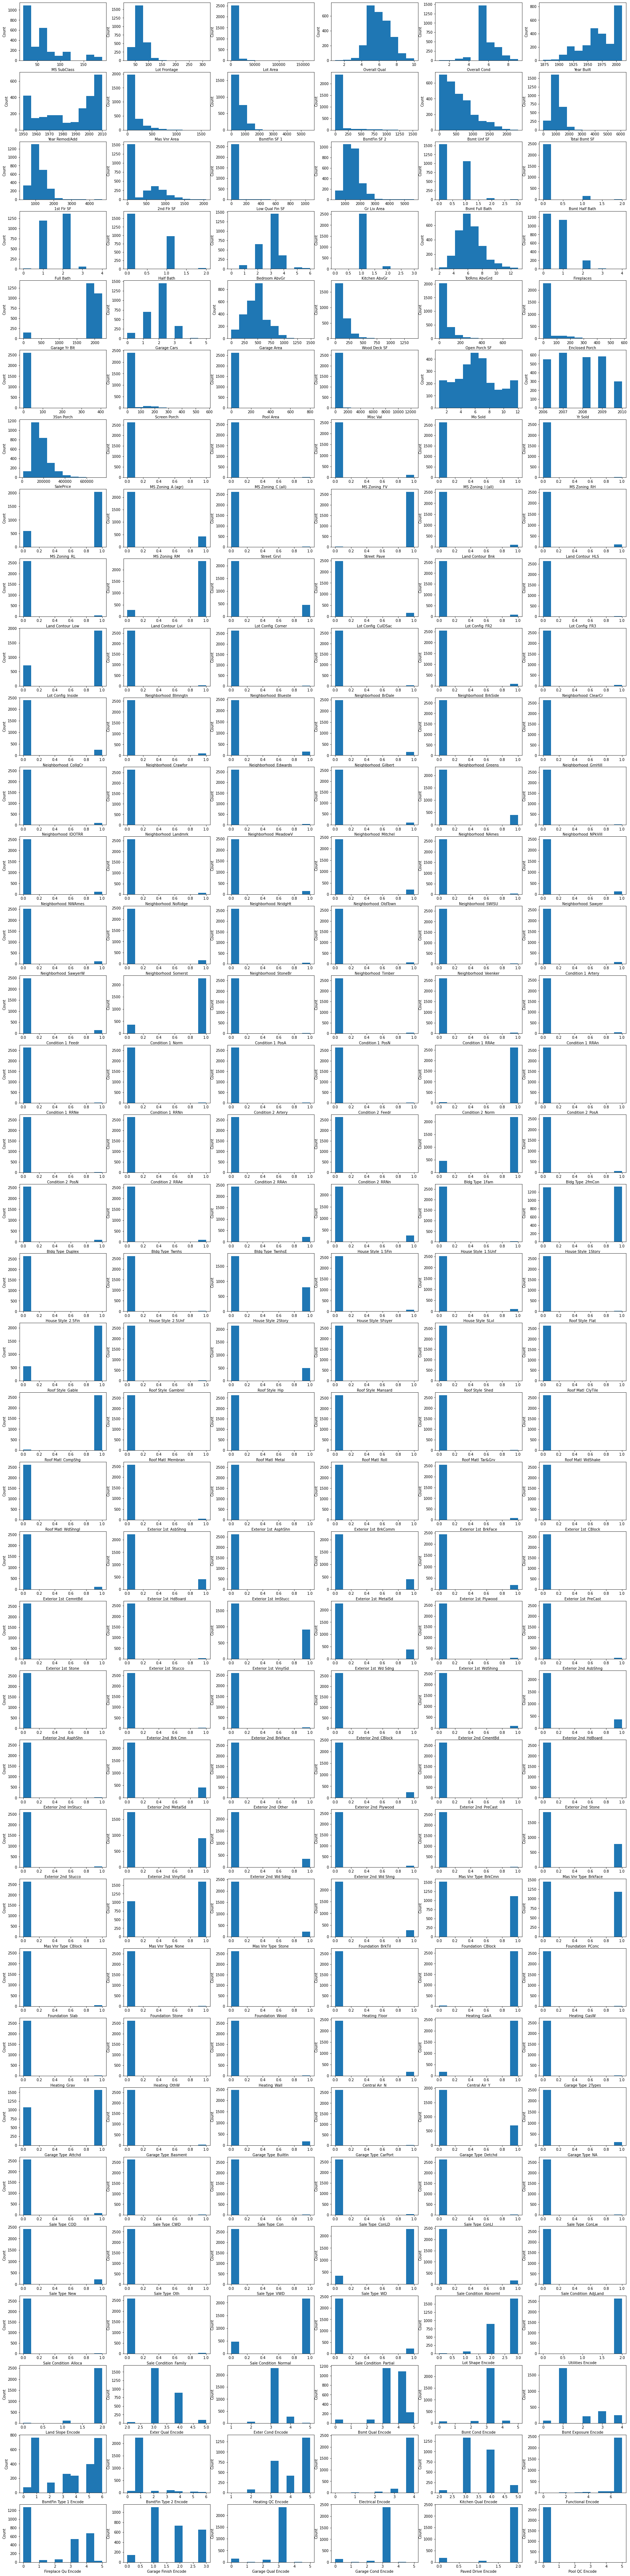

In [ ]:
fig, axs = plt.subplots(37,6, figsize = (30,130)) 
column_names = data_dum.columns
n = 0
for i in range(37): # Loop through rows 
  for j in range(6): # Loop through columns
    axs[i,j].hist(data_dum[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

In [ ]:
#plt.figure(figsize=(200,200))
#correlation_matrix = data_dum.corr().round(2)
#sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
corrs=data_dum.corrwith(data_dum['SalePrice'], axis=0).round(2).abs()
corrs = corrs[corrs < 1]
print(corrs.sort_values(ascending = False))

Overall Qual              0.80
Gr Liv Area               0.71
Exter Qual Encode         0.70
Kitchen Qual Encode       0.68
Garage Cars               0.65
Total Bsmt SF             0.63
Garage Area               0.63
1st Flr SF                0.62
Bsmt Qual Encode          0.60
Garage Finish Encode      0.56
Year Built                0.56
Year Remod/Add            0.54
Full Bath                 0.54
Fireplace Qu Encode       0.53
Foundation_PConc          0.52
Mas Vnr Area              0.50
TotRms AbvGrd             0.49
Fireplaces                0.47
Heating QC Encode         0.45
Neighborhood_NridgHt      0.44
BsmtFin SF 1              0.43
Mas Vnr Type_None         0.40
Bsmt Exposure Encode      0.40
Garage Type_Detchd        0.37
Sale Type_New             0.36
Sale Condition_Partial    0.35
Garage Type_Attchd        0.35
Foundation_CBlock         0.35
Exterior 2nd_VinylSd      0.34
Exterior 1st_VinylSd      0.34
BsmtFin Type 1 Encode     0.33
Lot Frontage              0.33
Wood Dec

#Generating a Model

##Creating a test sample

In [ ]:
data_nosales=data_dum.drop(['SalePrice'], axis=1)

In [ ]:
X = data_dum[data_nosales.columns]
X2 = sm.add_constant(X) # add constant so that intercept is estimated
print(X2.head())

y = data_dum['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2)

   const  MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0    1.0           20          62.0     14299             4             3   
1    1.0           90          72.0     10791             4             5   
2    1.0           50          50.0      9000             6             6   
3    1.0           60          68.0      7379             8             5   
4    1.0           70          60.0      7200             7             9   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  ...  \
0        1964            1964           0.0         513.0  ...   
1        1967            1967           0.0           0.0  ...   
2        1937            1950           0.0           0.0  ...   
3        2000            2000           0.0         484.0  ...   
4        1936            2007           0.0         350.0  ...   

   Heating QC Encode  Electrical Encode  Kitchen Qual Encode  \
0                  3                  4                    3   
1           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)
print(myfit2.coef_)
print(myfit2.intercept_)

[-3.70613353e-07 -1.23695058e+02  1.37526790e+02  5.25368807e-01
  8.34532849e+03  5.49016712e+03  3.03371449e+02  4.09222418e+01
  3.78738727e+01  2.02818807e+01  9.95598765e+00 -6.44945457e+00
  2.37884068e+01  1.02761693e+01  2.33697457e+01  7.69830337e+00
  4.13442178e+01  1.95546572e+03 -1.06756526e+03  7.15705224e+01
  1.28401011e+03 -5.94319975e+03 -9.39364075e+03  1.69646299e+03
  3.27348312e+03  4.03592555e+01  6.56313984e+03  2.63779788e+00
  8.98027854e+00  1.83517913e+00  5.45207065e-01 -2.23805305e+01
  2.84382293e+01 -4.54677201e+01  6.12804897e-01 -1.21672794e+02
 -7.02012991e+02 -2.41266584e+04 -7.04908108e+03  2.92957678e+03
  3.08910146e+04  7.76019680e+03 -1.91578750e+03 -8.48926120e+03
 -9.10672623e+03  9.10672623e+03 -1.95933802e+03  6.43737467e+03
 -4.05375635e+03 -4.24280296e+02 -1.76832767e+03  4.91456230e+03
 -4.07046902e+03  4.92545443e+02  4.31688950e+02  5.26360411e-02
  5.11421261e+03  1.73621988e+04  1.03864379e+03 -1.68882190e+04
 -1.55255011e+04  6.97442

Text(0, 0.5, 'Predicted Sales')

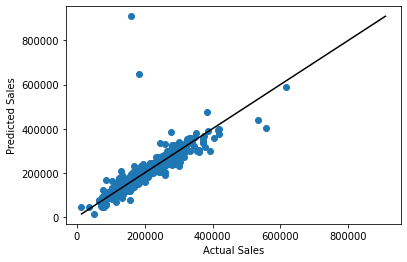

In [ ]:
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='black')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

##RSM

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {np.sqrt(mse)}")

RMSE: 45262.68373773901


In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv = 500)
mse = results.mean()
rmse = np.sqrt(abs(results.mean()))
print(f"CV RMSE: {rmse}")

CV RMSE: 28765.71151457192


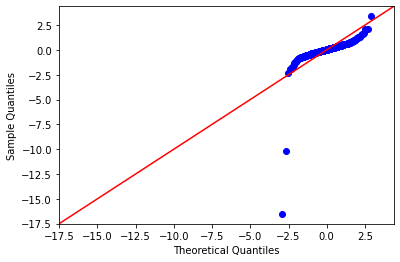

In [ ]:
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45");

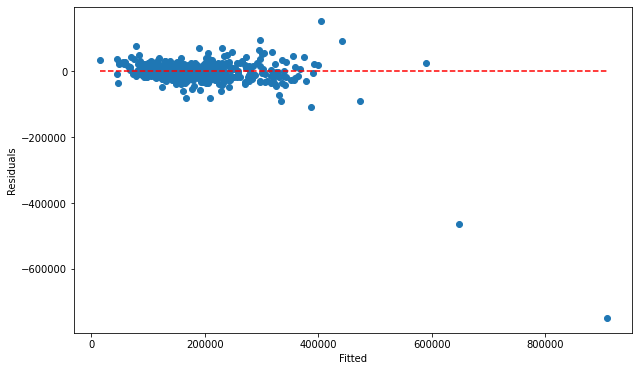

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed')

##Regularization

In [ ]:
%%capture --no-stdout
# Specify values of alpha we want to try 
alph = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20, 30, 50]

# Create empty list to hold results
results_alpha = []

for i in alph: 
  # Train the model
  my_fit_rr = Ridge(alpha = i, normalize = True) # Looping through alpha
  my_fit_rr.fit(X_train, y_train)

  # Calculate CV RMSE
  results = cross_val_score(my_fit_rr, X, y, scoring='neg_mean_squared_error', cv = 10)
  mse = results.mean()
  rmse = np.sqrt(abs(results.mean()))
  results_alpha.append(rmse)

results_df = pd.DataFrame({'Alpha': alph, 'RMSE': results_alpha})
print(results_df)

           Alpha          RMSE
0   1.000000e-15  28106.625980
1   1.000000e-10  28111.421917
2   1.000000e-08  28111.419644
3   1.000000e-04  28106.369603
4   1.000000e-03  28080.054248
5   1.000000e-02  27925.149158
6   1.000000e-01  27537.777318
7   1.000000e+00  29282.711870
8   2.000000e+00  31648.958206
9   3.000000e+00  33828.214939
10  4.000000e+00  35826.132136
11  5.000000e+00  37662.235851
12  1.000000e+01  44959.140567
13  2.000000e+01  53874.096960
14  3.000000e+01  59063.710413
15  5.000000e+01  64821.638467


Text(0, 0.5, 'Predicted Sales')

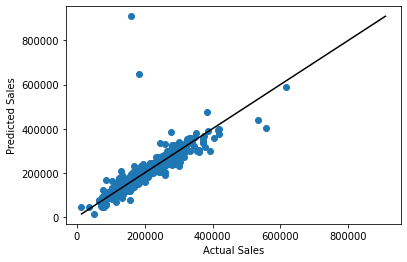

In [ ]:
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='black')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

looks like 6 gives us the lowest RMSE at 27.5k with an alpha of 1

In [ ]:
%%capture --no-stdout
# Train the model
my_fit_lasso = Lasso(alpha = 1, normalize = True, tol = .01, max_iter=1000) 
my_fit_lasso.fit(X_train, y_train)

# Calculate CV RMSE
results = cross_val_score(my_fit_lasso, X, y, scoring='neg_mean_squared_error', cv = 10)
mse = results.mean()
rmse = np.sqrt(abs(results.mean()))
print(f"CV RMSE: {rmse}")

CV RMSE: 27825.76366278346


In [ ]:
model_results['Ridge'] = my_fit_rr.coef_
model_results

NameError: ignored

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (100,70))
model_results.plot(x = 'Predictor', kind = 'bar', ax = ax)
ax.set_ylabel('Coefficient')
plt.grid()

##Feature Selection

In [ ]:
data_dum.corr()['SalePrice'].abs().sort_values(ascending = False)

SalePrice                 1.000000e+00
Overall Qual              8.047552e-01
Gr Liv Area               7.058255e-01
Exter Qual Encode         7.031322e-01
Kitchen Qual Encode       6.827539e-01
Garage Cars               6.468159e-01
Garage Area               6.334348e-01
Total Bsmt SF             6.294277e-01
1st Flr SF                6.179365e-01
Bsmt Qual Encode          6.038977e-01
Year Built                5.627074e-01
Garage Finish Encode      5.620316e-01
Full Bath                 5.423529e-01
Year Remod/Add            5.395373e-01
Fireplace Qu Encode       5.273782e-01
Foundation_PConc          5.213624e-01
Mas Vnr Area              4.989861e-01
TotRms AbvGrd             4.936468e-01
Fireplaces                4.684888e-01
Heating QC Encode         4.520269e-01
Neighborhood_NridgHt      4.352014e-01
BsmtFin SF 1              4.273991e-01
Mas Vnr Type_None         4.010236e-01
Bsmt Exposure Encode      3.990603e-01
Garage Type_Detchd        3.665605e-01
Sale Type_New            

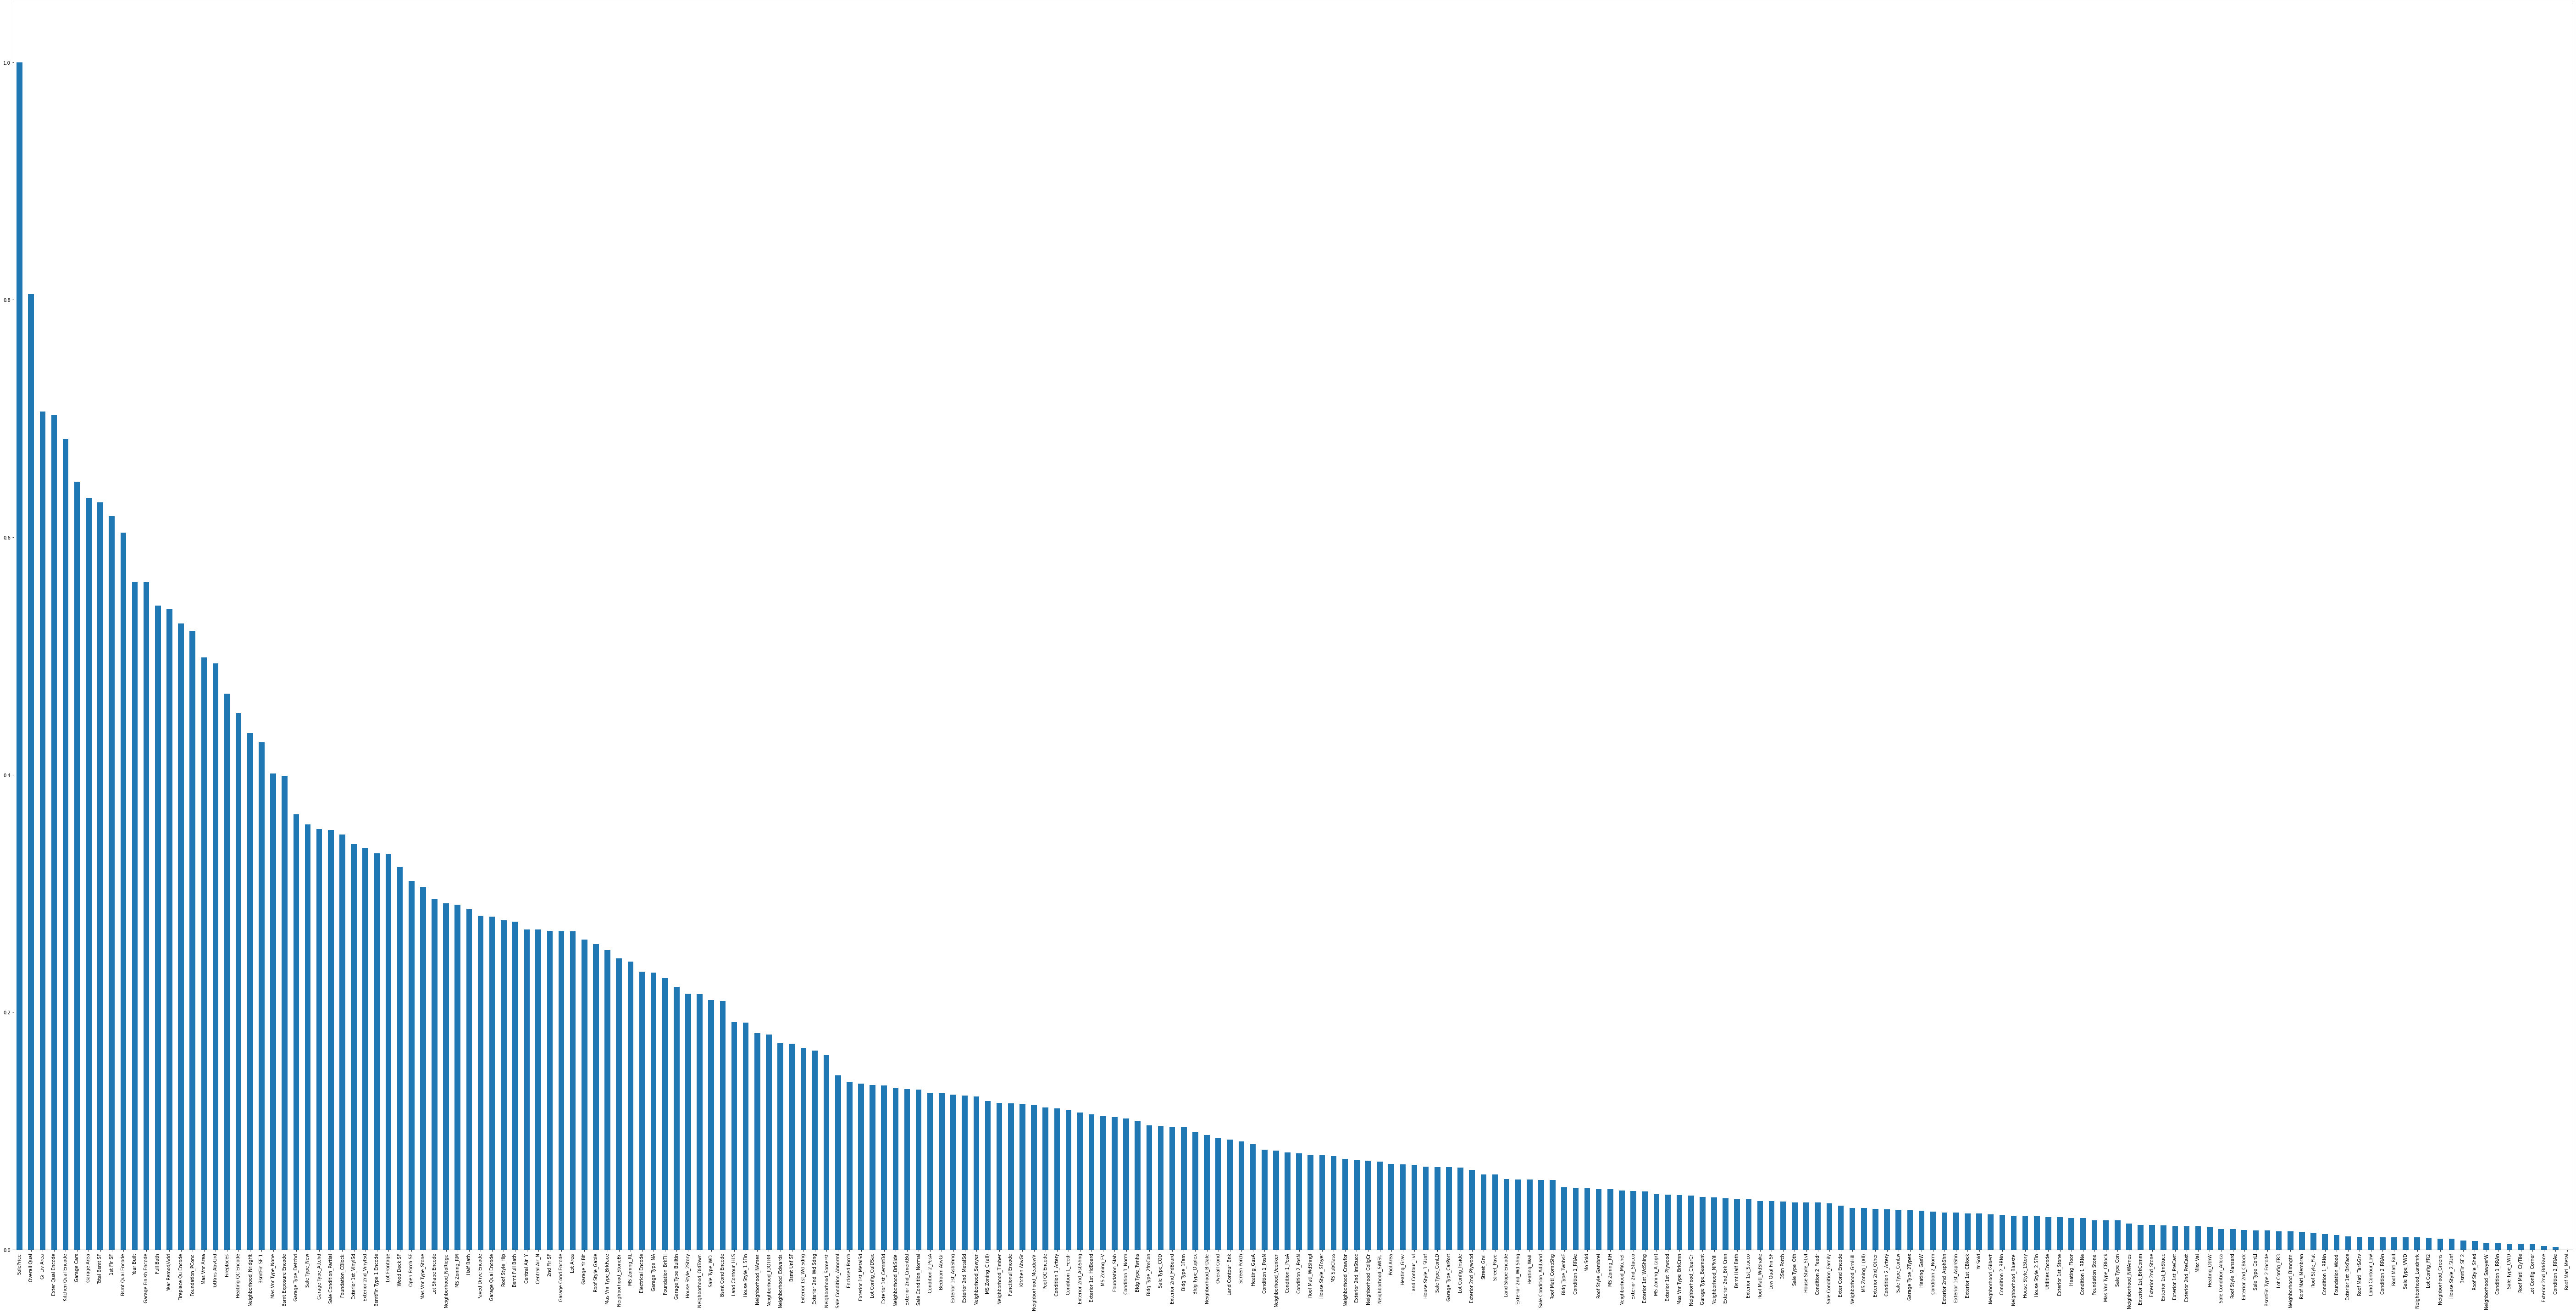

In [ ]:
data_dum.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (100,50))

Setting the cutoff just before Sale Condition Abnormal. So we will keep everything above a .25




In [ ]:
corrs = data_dum.corr()['SalePrice'].abs().sort_values(ascending = False) 
keep = corrs[(corrs>.25) & (corrs <1)]
X_corr = X[keep.index]
X = pd.concat([X_corr, data_dum['SalePrice']], axis = 1)


In [ ]:
X_corr

In [ ]:
# Perform CV
n = 500
results = np.zeros(n)
for idx in range(n):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  results[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"CV RMSE: {results.mean().round(2)}")
print(f"Number of Predictors: {len(X.columns)}")

The RMSE went up by 3k but check out how much more readable the data is. 

In [ ]:
X.corr()['SalePrice'].abs().sort_values(ascending = False).plot(kind = 'bar', figsize = (100,50))

In [ ]:
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45")
plt.show()